**HARSHITH N GOWDA**
gowdaharshith683@gmail.com


---

This is a small demonstration of a machine detects spam sms using machine learning





**SMS SPAM DETECTION**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.info() #info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


***DATA CLEANING***

In [10]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum() # count of duplicates present

403

In [13]:
df.drop_duplicates(keep='first', inplace=True) #dropped duplicates

In [14]:
df.isna().sum() #counting NaN Values

target    0
sms       0
dtype: int64

In [15]:
df.loc[df.target=='ham', 'target'] = 0 # 0 indicates not spam
df.loc[df.target=='spam', 'target'] = 1 # 1 indicates spam

In [16]:
df.head() # printsrows

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.shape#obtains the shape of data set


(5169, 2)

In [19]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**EDA**

<Axes: ylabel='target'>

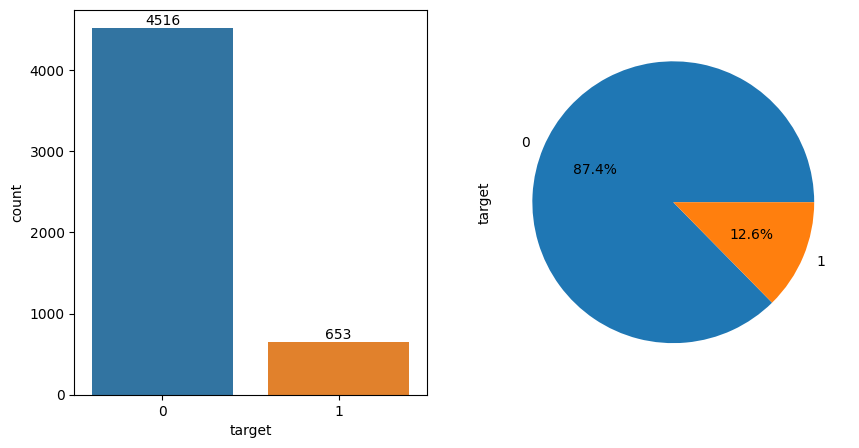

In [20]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(df, x='target', ax=ax[0])
# show count number above the bins
for container in plot1.containers:
    plot1.bar_label(container)

df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

**OBSERVATIONS:**
In the above Pie Chart, 87.4% of the SMS are not Spam but the rest of 12.6% are Spam

since the data is imbalanced we need to take that into consideration while splitting the training and testing set

Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start  sentences


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**FEATURE ENGINEERING**

In [22]:
# NUMBER OF SENTENCES
df['sentences_count'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
# NUMBER OF WORDS
df['words_count'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
# NUMBER OF CHARACTERS
df['characters_count'] = df['sms'].apply(len)

In [26]:
df.head()

,target,sms,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


In [27]:
df[df.target==1].describe() #for spam

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [28]:
df[df.target==0].describe() #not spam

,sentences_count,words_count,characters_count
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


**OBSERVATION:**
Spam message has more sentences/words count compared to non spam messages

<Axes: xlabel='characters_count', ylabel='Count'>

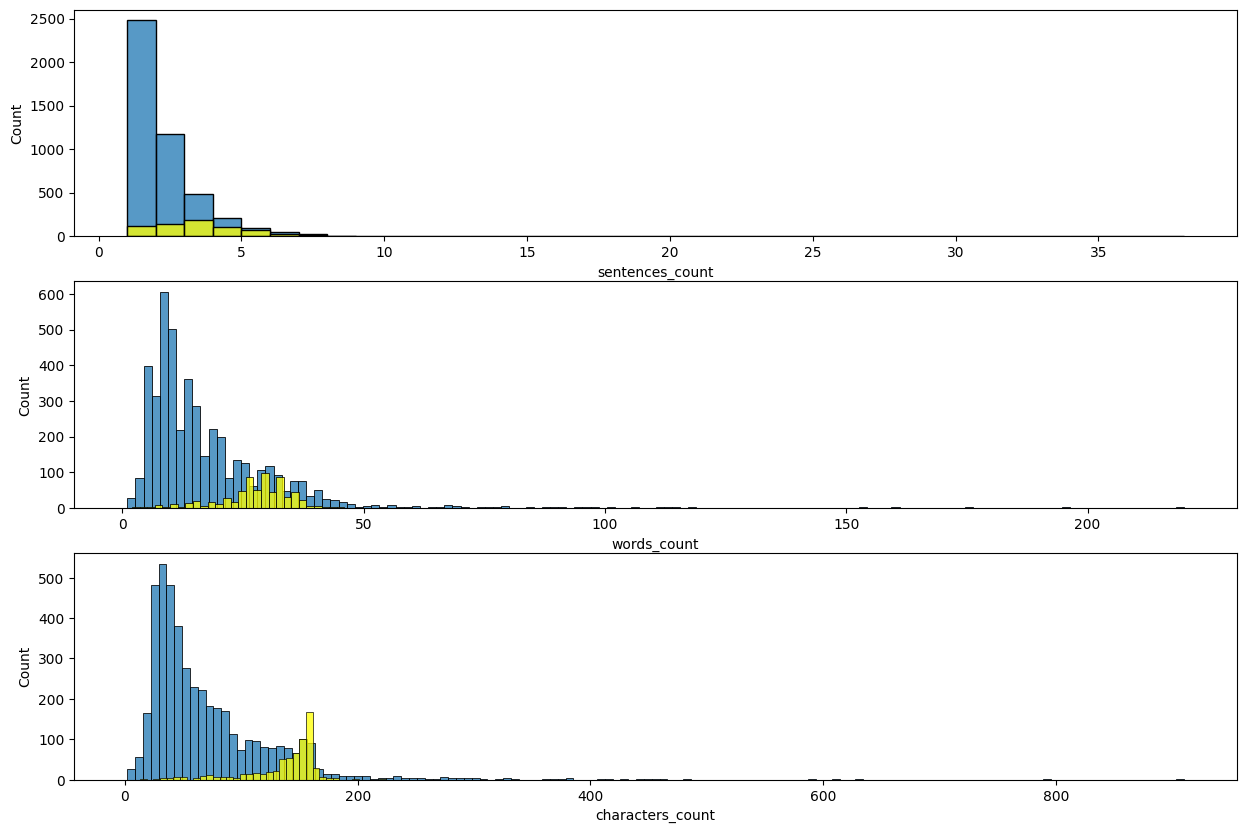

In [30]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='yellow', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='yellow', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='yellow', ax=ax[2])

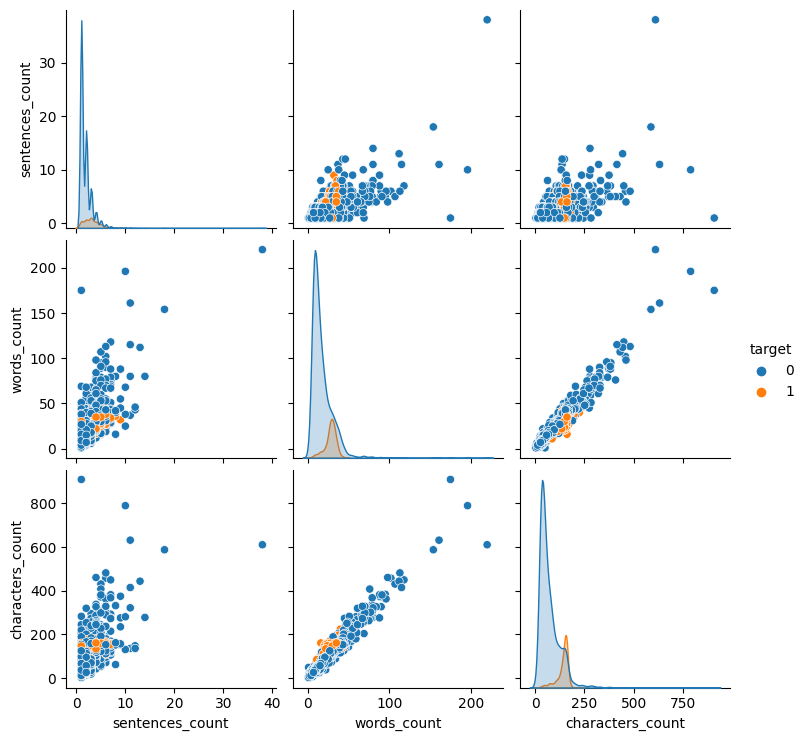

In [31]:
sns.pairplot(df, hue='target')

**DATA PREPROCESSING**
TEXT PREPROCESSING
TASK NEED TO ACOMPLISHED:
-Lower text
-Tokenization: for example transform 'how are you' into -> ['how', 'are', 'you']
-Remove special characters
-Remove stop words (the, is, are...etc) & punctuation
-Stemming: for example transform cretive, creating, created, creating i

In [32]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [33]:
def preprocess_text(text):
    # lower text
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # remove special characters
    text = [i for i in text if i.isalnum()]

    # remove stop words & punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
df['text_transformed'] = df['sms'].apply(preprocess_text)


In [39]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [41]:
wc_spam = wc.generate(df[df.target == 1]['text_transformed'].str.cat(sep=' '))

**MODELING**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

CountVectorizer:It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text

In [45]:
A= cv.fit_transform(df['text_transformed']).toarray()

In [46]:
A.shape

(5169, 6708)

In [47]:
b=df['target'].values

In [48]:
from sklearn.model_selection import train_test_split

# we know  that our dataset is not balanced that's why we use stratify
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=100, stratify=b)

In [49]:
b_train = b_train.astype(int)
b_test = b_test.astype(int)

in this classification problem where we need predict weather a sms is a spam or not in this example the worst scenario is to classify an email as spam knowing that is not spam that’s why we need to decrease FP (false positive) → that’s why we need to use PRECISION

In [50]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
def test_models(models):

    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(A_train, b_train)
        b_pred = model.predict(A_test)
        accuracy = accuracy_score(b_test, b_pred)
        precision = precision_score(b_test, b_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(b_test, b_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

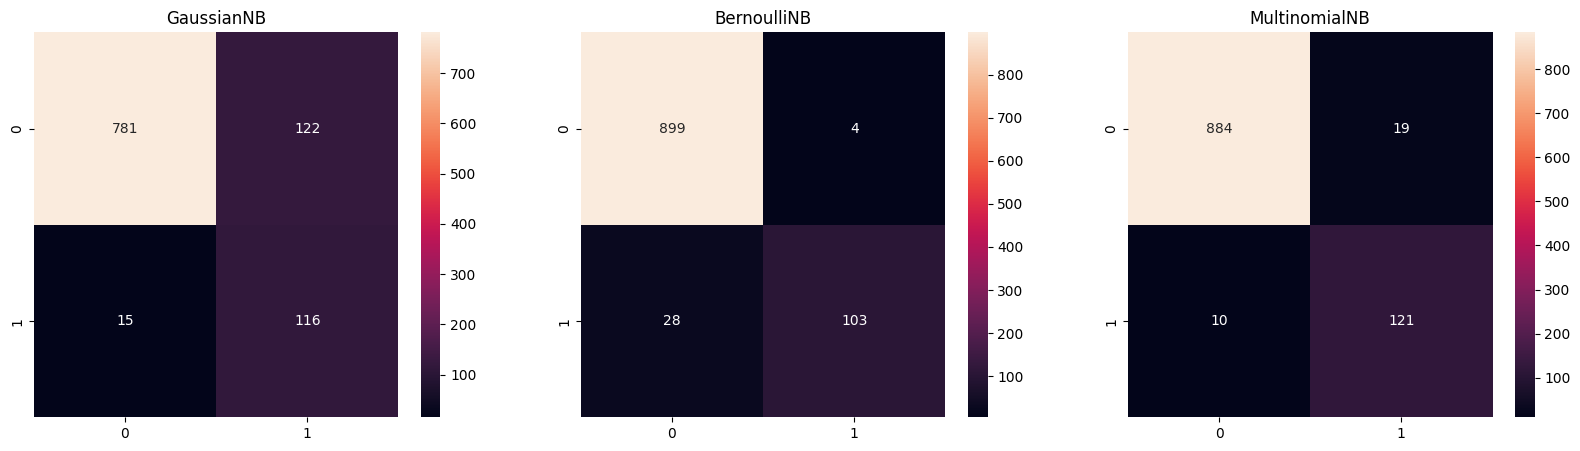

In [52]:
models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)



**TfidfVectorizer (Term Frequency-Inverse Document Frequency):

**
 It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus).

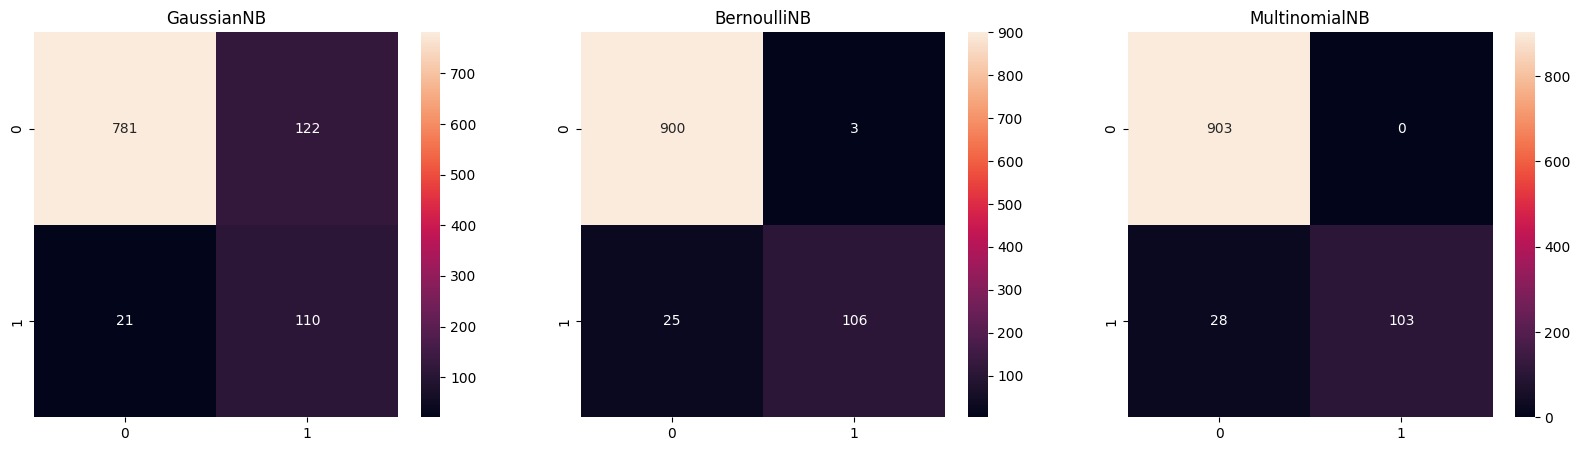

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=4000)
A = tfidf.fit_transform(df['text_transformed']).toarray()

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=100, stratify=b)
b_train = b_train.astype(int)
b_test = b_test.astype(int)

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)


In [54]:
scores

,model,accracy score,precision score
0,GaussianNB,0.861702,0.474138
1,BernoulliNB,0.972921,0.972477
2,MultinomialNB,0.972921,1.000000


It is unbelivable that the MultinomialNB have a precision of 1 and it seems that it is best performing models among others.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=60, n_jobs=-1),
    # long training time
    #"Ada Boost": AdaBoostClassifier(n_estimators=60),
    #"Bagging clf": BaggingClassifier(n_estimators=60, n_jobs=-1),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=60),
    #"XGB": XGBClassifier(n_estimators=60),
}

In [57]:
def train_clf(clf, A_train, b_train, A_test, b_test):
    clf.fit(A_train, b_train)
    b_pred = clf.predict(A_test)
    accuracy = accuracy_score(b_test, b_pred)
    precision = precision_score(b_test, b_pred)
    return accuracy, precision

In [60]:
import time

accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, A_train, b_train, A_test, b_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +  f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' +
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.96, precision: 0.98, training time(s): 0.79
Model: SCV, accuracy: 0.97, precision: 0.99, training time(s): 34.59
Model: KNN, accuracy: 0.92, precision: 1.0, training time(s): 1.21
Model: MNB, accuracy: 0.97, precision: 1.0, training time(s): 0.08
Model: Decision Tree, accuracy: 0.93, precision: 0.79, training time(s): 0.89
Model: Random Forest, accuracy: 0.97, precision: 0.99, training time(s): 8.26
Model: Extra Trees, accuracy: 0.98, precision: 1.0, training time(s): 25.71


In [61]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})


In [62]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
2,KNN,0.916828,1.000000
3,MNB,0.972921,1.000000
6,Extra Trees,0.975822,1.000000
1,SCV,0.972921,0.990476
5,Random Forest,0.968085,0.990000
0,Logistic Regression,0.955513,0.977528
4,Decision Tree,0.928433,0.793814


In [74]:
best_models = {

    "MNB": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
}
grid = {

    "MNB": {
        "alpha": [0.1, 0.5, 1.0]
          },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
            }
}

In [65]:
A_train_, A_valid, b_train_, b_valid = train_test_split(A_train, b_train, test_size=0.2, random_state=100, stratify=b_train)
b_train_ = b_train_.astype(int)
b_valid = b_valid.astype(int)

In [75]:
from sklearn.model_selection import GridSearchCV

model_best_params = best_models.copy()

for key, model in best_models.items():
    start = time.time()

    # cv>1 takes long time
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1, scoring='f1')
    grid_search.fit(A_train_, b_train_)

    stop = time.time()
    training_time = np.round((stop-start), 2)
    model_best_params[key] = grid_search.best_params_

    print(f'Model: {key}, '+
          f'score: {grid_search.score(A_valid, b_valid)}'
          f'training time(s): {training_time}')
    #checking scores and time required for executing


Model: MNB, score: 0.8877551020408162training time(s): 2.33
Model: KNN, score: 0.5655172413793104training time(s): 17.29


In [77]:
model_best_params

{'MNB': {'alpha': 0.1}, 'KNN': {'n_neighbors': 3, 'weights': 'distance'}}

In [79]:
best_models = {

    "MNB": MultinomialNB(**model_best_params['MNB']),
    "KNN": KNeighborsClassifier(**model_best_params['KNN'], n_jobs=-1),
}

In [80]:
accuracy_scores = []
precision_scores = []

for key, model in best_models.items():

    accuracy, precision = train_clf(model, A_train, b_train, A_test, b_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ')

temp_df = pd.DataFrame({'Classifier': best_models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})
#checking accuracy and precisions

Model: MNB, accuracy: 0.98, precision: 0.96, 
Model: KNN, accuracy: 0.93, precision: 1.0, 


In [81]:
temp_df

,Classifier,Accuracy,Precision
0,MNB,0.983559,0.959677
1,KNN,0.934236,1.000000


In [83]:
benchmark_df

,Classifier,Accuracy,Precision
0,Logistic Regression,0.955513,0.977528
1,SCV,0.972921,0.990476
2,KNN,0.916828,1.000000
3,MNB,0.972921,1.000000
4,Decision Tree,0.928433,0.793814
5,Random Forest,0.968085,0.990000
6,Extra Trees,0.975822,1.000000


**VOTING CLASSIFIER**

In [85]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[

    ('MNB', MultinomialNB()),
    ('KNN', KNeighborsClassifier(**model_best_params['KNN']))
], voting='soft', n_jobs=-1)

In [86]:
voting.fit(A_train, b_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('KNN',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))],
                 n_jobs=-1, voting='soft')

In [89]:
b_pred = voting.predict(A_test)
print(f'accuracy: {accuracy_score(b_test, b_pred)}')
print(f'precision: {precision_score(b_test, b_pred)}')


accuracy: 0.9671179883945842
precision: 1.0
